In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
%matplotlib inline

In [56]:
df = pd.read_csv('housing_dataset.csv')

In [57]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
import seaborn as sns

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

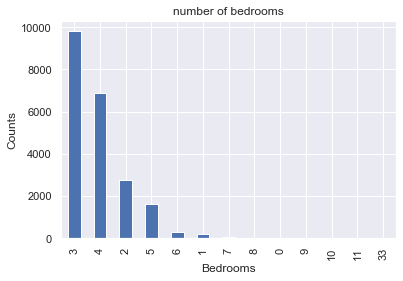

In [59]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Counts')
sns.set(style='darkgrid')
sns.despine

<Figure size 720x720 with 0 Axes>

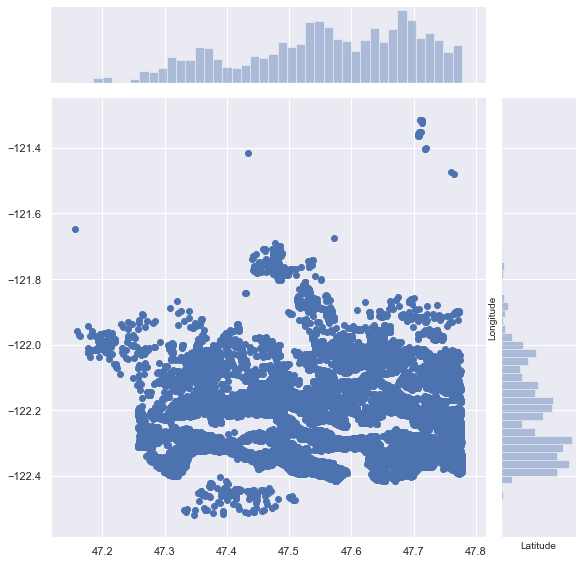

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [66]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y = df.long.values, height = 8)
plt.xlabel('Latitude',fontsize = 10)
plt.ylabel('Longitude',fontsize = 10)
plt.show()
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

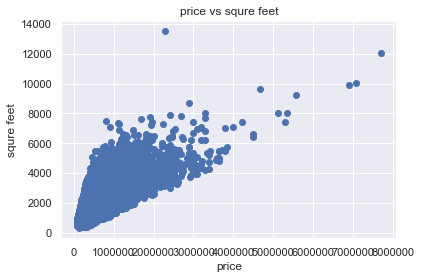

In [80]:
plt.scatter(df['price'],df['sqft_living'])
plt.title('price vs squre feet')
plt.xlabel('price')
plt.ylabel('squre feet')
sns.despine

Text(0.5, 1.0, 'bedroom vs price')

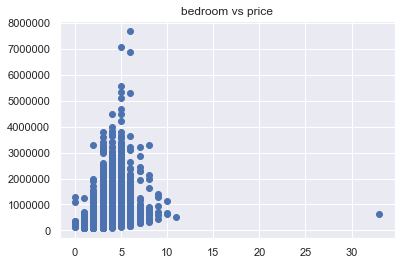

In [81]:
plt.scatter(df['bedrooms'],df['price'])
plt.title('bedroom vs price')

Text(0.5, 1.0, 'price vs position')

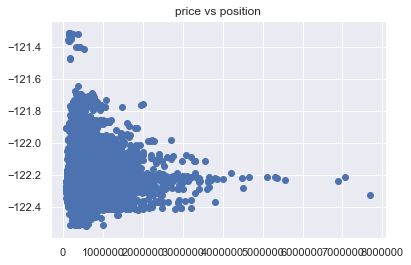

In [84]:
plt.scatter(df['price'], df['long'])
plt.title('price vs position')

Text(0.5, 1.0, 'price vs position')

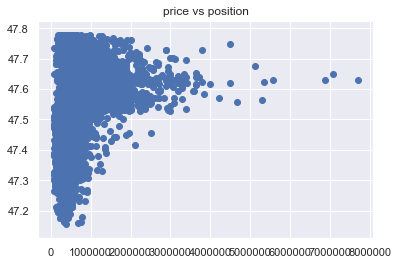

In [85]:
plt.scatter(df['price'],df['lat'])
plt.title('price vs position')

Text(0.5, 1.0, 'total area vs price')

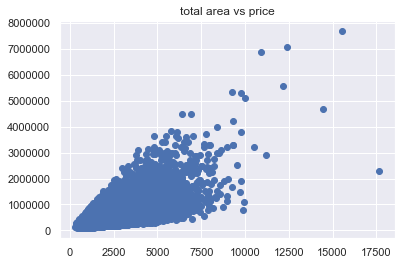

In [86]:
plt.scatter(df['sqft_living']+df['sqft_basement'],df['price'])
plt.title('total area vs price')

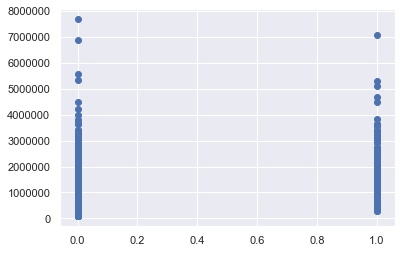

In [87]:
plt.scatter(df['waterfront'],df['price'])

In [90]:
train_set = df.drop(columns=['id','price'])

In [92]:
train_set.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [93]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

In [96]:
label = df['price']
conv_date= [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_date
train_set = df.drop(['id', 'price'],axis=1)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train , x_test , y_train , y_test = train_test_split(train_set , label , test_size = 0.10,random_state =2)

In [106]:
reg_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
reg_model.score(x_test,y_test)

0.7320342760357335

In [119]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.05, loss = 'ls')

In [120]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [121]:
clf.score(x_test,y_test)

0.9206311958204116